In [1]:
import pandas as pd
import itertools
import numpy as np

In [2]:
url = '/Users/anjasha/Downloads/MHR.csv'

df = pd.read_csv(url)

In [3]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [4]:
df.shape
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


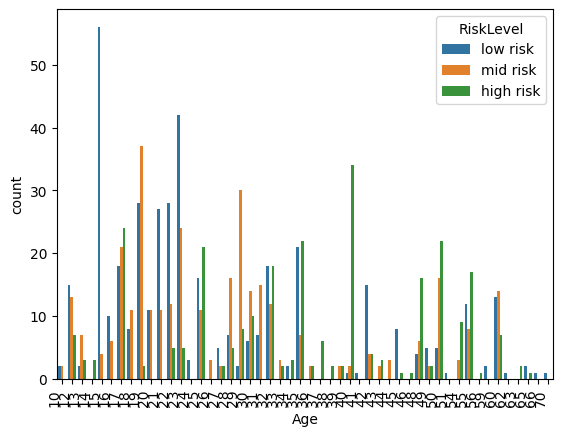

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df,x='Age',hue='RiskLevel')
plt.xticks(rotation=90, ha='right');

In [6]:
pre_df = pd.get_dummies(df,columns=['RiskLevel'])
df2 = pre_df.rename({'RiskLevel_high risk': 'RiskLevel_high', 'RiskLevel_low risk': 'RiskLevel_low', 'RiskLevel_mid risk': 'RiskLevel_mid'}, axis='columns')
df2

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel_high,RiskLevel_low,RiskLevel_mid
0,25,130,80,15.0,98.0,86,True,False,False
1,35,140,90,13.0,98.0,70,True,False,False
2,29,90,70,8.0,100.0,80,True,False,False
3,30,140,85,7.0,98.0,70,True,False,False
4,35,120,60,6.1,98.0,76,False,True,False
...,...,...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,True,False,False
1010,55,120,90,18.0,98.0,60,True,False,False
1011,35,85,60,19.0,98.0,86,True,False,False
1012,43,120,90,18.0,98.0,70,True,False,False


In [7]:
# Splitting the data
from sklearn.model_selection import train_test_split, KFold

X = df2.drop(['RiskLevel_high', 'RiskLevel_low', 'RiskLevel_mid'], axis=1)
y_h, y_l, y_m = df2['RiskLevel_high'], df2['RiskLevel_low'], df2['RiskLevel_mid']

X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(
    X, y_h, test_size=0.2
)

X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(
    X, y_l, test_size=0.2
)

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X, y_m, test_size=0.2
)

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
    precision_score,
    recall_score
)

model_h = GaussianNB()
model_l = GaussianNB()
model_m = GaussianNB()

model_h_v2 = GaussianNB(var_smoothing = 1e-5)
model_l_v2 = GaussianNB(var_smoothing = 1e-5)
model_m_v2 = GaussianNB(var_smoothing = 1e-5)

model_h_v3 = GaussianNB(var_smoothing = 1e-23)
model_l_v3 = GaussianNB(var_smoothing = 1e-23)
model_m_v3 = GaussianNB(var_smoothing = 1e-23)

model_h.fit(X_train_h, y_train_h);
model_l.fit(X_train_l, y_train_l);
model_m.fit(X_train_m, y_train_m);

model_h_v2.fit(X_train_h, y_train_h);
model_l_v2.fit(X_train_l, y_train_l);
model_m_v2.fit(X_train_m, y_train_m);

model_h_v3.fit(X_train_h, y_train_h);
model_l_v3.fit(X_train_l, y_train_l);
model_m_v3.fit(X_train_m, y_train_m);

y_pred_h_naive = model_h.predict(X_test_h)
y_pred_l_naive = model_l.predict(X_test_l)
y_pred_m_naive = model_m.predict(X_test_m)

y_pred_h_naive_v2 = model_h_v2.predict(X_test_h)
y_pred_l_naive_v2 = model_l_v2.predict(X_test_l)
y_pred_m_naive_v2 = model_m_v2.predict(X_test_m)

y_pred_h_naive_v3 = model_h_v3.predict(X_test_h)
y_pred_l_naive_v3 = model_l_v3.predict(X_test_l)
y_pred_m_naive_v3 = model_m_v3.predict(X_test_m)

In [9]:
# for precision and recall values
def print_precision_and_recall(name, test, prediction):
  precision = precision_score(test, prediction)
  recall = recall_score(test, prediction)
  print(f"{name}: Precision = {precision}, Recall = {recall}")

# precision and recall values for Naive Bayes
print_precision_and_recall("Naive Bayes with default parameters - High Risk", y_test_h, y_pred_h_naive)
print_precision_and_recall("Naive Bayes with default parameters - Low Risk", y_test_l, y_pred_l_naive)
print_precision_and_recall("Naive Bayes with default parameters - Medium Risk", y_test_m, y_pred_m_naive)
print("")
print_precision_and_recall("Naive Bayes with smoothing variable tuned to 1e-3 - High Risk", y_test_h, y_pred_h_naive_v2)
print_precision_and_recall("Naive Bayes with smoothing variable tuned to 1e-3 - Low Risk", y_test_l, y_pred_l_naive_v2)
print_precision_and_recall("Naive Bayes with smoothing variable tuned to 1e-3 - Medium Risk", y_test_m, y_pred_m_naive_v2)
print("")
print_precision_and_recall("Naive Bayes with smoothing variable tuned to 1 - High Risk", y_test_h, y_pred_h_naive_v3)
print_precision_and_recall("Naive Bayes with smoothing variable tuned to 1 - Low Risk", y_test_l, y_pred_l_naive_v3)
print_precision_and_recall("Naive Bayes with smoothing variable tuned to 1 - Medium Risk", y_test_m, y_pred_m_naive_v3)
    

Naive Bayes with default parameters - High Risk: Precision = 0.8095238095238095, Recall = 0.5862068965517241
Naive Bayes with default parameters - Low Risk: Precision = 0.5724137931034483, Recall = 0.9880952380952381
Naive Bayes with default parameters - Medium Risk: Precision = 0.45161290322580644, Recall = 0.6086956521739131

Naive Bayes with smoothing variable tuned to 1e-3 - High Risk: Precision = 0.8095238095238095, Recall = 0.5862068965517241
Naive Bayes with smoothing variable tuned to 1e-3 - Low Risk: Precision = 0.5724137931034483, Recall = 0.9880952380952381
Naive Bayes with smoothing variable tuned to 1e-3 - Medium Risk: Precision = 0.45161290322580644, Recall = 0.6086956521739131

Naive Bayes with smoothing variable tuned to 1 - High Risk: Precision = 0.8095238095238095, Recall = 0.5862068965517241
Naive Bayes with smoothing variable tuned to 1 - Low Risk: Precision = 0.5724137931034483, Recall = 0.9880952380952381
Naive Bayes with smoothing variable tuned to 1 - Medium Ris

In [10]:
from sklearn.model_selection import ( KFold )

def KFoldResult(n, X, y, model):
  kf = KFold(n_splits=4)

  fold = 0

  acc, pres, rec = 0, 0, 0

  for train_idx, val_idx in kf.split(X, y):
    X_tr = X.loc[train_idx]
    y_tr = y.loc[train_idx]

    X_val = X.loc[val_idx]
    y_val = y.loc[val_idx]

    if model == 'logistic':
        model = LogisticRegression(max_iter=1000)
    elif model == 'logistic_regularization':
        model = LogisticRegression(max_iter=1000, C=0.5)
    elif model == 'logistic_solver':
        model = LogisticRegression(max_iter=1000, solver='sag')
    elif model == 'gaussianDefault':
        model = GaussianNB()
    elif model == 'gaussianV2':
      model = GaussianNB(var_smoothing = 1e-5)
    elif model == 'gaussianV3':
      model = GaussianNB(var_smoothing = 1e-23)

    model.fit(X_tr, y_tr)
    pred = model.predict(X_val)

    acc_score = accuracy_score(y_val, pred)
    acc = acc + acc_score

    pres_score = precision_score(y_val, pred)
    pres = pres + pres_score

    rec_score = recall_score(y_val, pred)
    rec = rec + rec_score

    print(f"======= Fold {fold} ========")
    print(
        f"Our accuracy on the validation set is {acc_score:0.4f}, precision is {pres_score:0.4f}, and recall is {rec_score:0.4f}"
    )
    fold += 1

  print(f"average accuracy is {acc/fold:0.4f} \naverage precision is {pres/fold:0.4f} \naverage recall is {rec/fold:0.4f}")


In [11]:
print('For Naive Bayes with default parameters: \n')
print("\n For High risk \n")
KFoldResult(4, X, y_h, 'gaussianDefault')

print("\n For Mid risk \n")
KFoldResult(4, X, y_m, 'gaussianDefault')

print("\n For Low risk \n")
KFoldResult(4, X, y_l, 'gaussianDefault')
     

For Naive Bayes with default parameters: 


 For High risk 

======= Fold 0 ========
Our accuracy on the validation set is 0.8465, precision is 0.9107, and recall is 0.6000
======= Fold 1 ========
Our accuracy on the validation set is 0.8543, precision is 0.7931, and recall is 0.6479
======= Fold 2 ========
Our accuracy on the validation set is 0.8893, precision is 0.8085, and recall is 0.6667
======= Fold 3 ========
Our accuracy on the validation set is 0.8735, precision is 0.7547, and recall is 0.6780
average accuracy is 0.8659 
average precision is 0.8168 
average recall is 0.6481

 For Mid risk 

======= Fold 0 ========
Our accuracy on the validation set is 0.6260, precision is 0.3719, and recall is 0.7031
======= Fold 1 ========
Our accuracy on the validation set is 0.5906, precision is 0.3130, and recall is 0.5902
======= Fold 2 ========
Our accuracy on the validation set is 0.6364, precision is 0.5133, and recall is 0.6105
======= Fold 3 ========
Our accuracy on the validation s

In [12]:
print('For Naive Bayes with smoothing factor of 1e-5: \n')
print("\n For High risk \n")
KFoldResult(4, X, y_h, 'gaussianV2')

print("\n For Mid risk \n")
KFoldResult(4, X, y_m, 'gaussianV2')

print("\n For Low risk \n")
KFoldResult(4, X, y_l, 'gaussianV2')

For Naive Bayes with smoothing factor of 1e-5: 


 For High risk 

======= Fold 0 ========
Our accuracy on the validation set is 0.8465, precision is 0.9107, and recall is 0.6000
======= Fold 1 ========
Our accuracy on the validation set is 0.8543, precision is 0.7931, and recall is 0.6479
======= Fold 2 ========
Our accuracy on the validation set is 0.8893, precision is 0.8085, and recall is 0.6667
======= Fold 3 ========
Our accuracy on the validation set is 0.8735, precision is 0.7547, and recall is 0.6780
average accuracy is 0.8659 
average precision is 0.8168 
average recall is 0.6481

 For Mid risk 

======= Fold 0 ========
Our accuracy on the validation set is 0.6260, precision is 0.3719, and recall is 0.7031
======= Fold 1 ========
Our accuracy on the validation set is 0.5906, precision is 0.3130, and recall is 0.5902
======= Fold 2 ========
Our accuracy on the validation set is 0.6364, precision is 0.5133, and recall is 0.6105
======= Fold 3 ========
Our accuracy on the valida

In [13]:
print('For Naive Bayes with smoothing factor of 1e-23: \n')
print("\n For High risk \n")
KFoldResult(4, X, y_h, 'gaussianV3')

print("\n For Mid risk \n")
KFoldResult(4, X, y_m, 'gaussianV3')
\

print("\n For Low risk \n")
KFoldResult(4, X, y_l, 'gaussianV3')

For Naive Bayes with smoothing factor of 1e-23: 


 For High risk 

======= Fold 0 ========
Our accuracy on the validation set is 0.8465, precision is 0.9107, and recall is 0.6000
======= Fold 1 ========
Our accuracy on the validation set is 0.8543, precision is 0.7931, and recall is 0.6479
======= Fold 2 ========
Our accuracy on the validation set is 0.8893, precision is 0.8085, and recall is 0.6667
======= Fold 3 ========
Our accuracy on the validation set is 0.8735, precision is 0.7547, and recall is 0.6780
average accuracy is 0.8659 
average precision is 0.8168 
average recall is 0.6481

 For Mid risk 

======= Fold 0 ========
Our accuracy on the validation set is 0.6260, precision is 0.3719, and recall is 0.7031
======= Fold 1 ========
Our accuracy on the validation set is 0.5906, precision is 0.3130, and recall is 0.5902
======= Fold 2 ========
Our accuracy on the validation set is 0.6364, precision is 0.5133, and recall is 0.6105
======= Fold 3 ========
Our accuracy on the valid

In [1]:

import pandas as pd
import itertools
import numpy as np

In [2]:
url = '/Users/anjasha/Downloads/MHR.csv'

df = pd.read_csv(url)

In [3]:

df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [4]:
df.shape
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


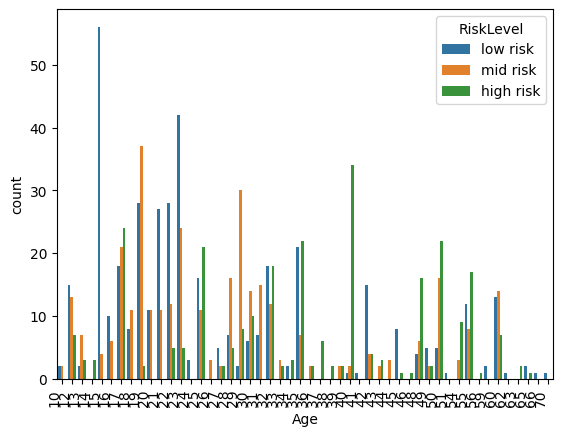

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df,x='Age',hue='RiskLevel')
plt.xticks(rotation=90, ha='right');

In [6]:
pre_df = pd.get_dummies(df,columns=['RiskLevel'])
df2 = pre_df.rename({'RiskLevel_high risk': 'RiskLevel_high', 'RiskLevel_low risk': 'RiskLevel_low', 'RiskLevel_mid risk': 'RiskLevel_mid'}, axis='columns')
df2
     

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel_high,RiskLevel_low,RiskLevel_mid
0,25,130,80,15.0,98.0,86,True,False,False
1,35,140,90,13.0,98.0,70,True,False,False
2,29,90,70,8.0,100.0,80,True,False,False
3,30,140,85,7.0,98.0,70,True,False,False
4,35,120,60,6.1,98.0,76,False,True,False
...,...,...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,True,False,False
1010,55,120,90,18.0,98.0,60,True,False,False
1011,35,85,60,19.0,98.0,86,True,False,False
1012,43,120,90,18.0,98.0,70,True,False,False


In [7]:
# Splitting the data
from sklearn.model_selection import train_test_split, KFold

X = df2.drop(['RiskLevel_high', 'RiskLevel_low', 'RiskLevel_mid'], axis=1)
y_h, y_l, y_m = df2['RiskLevel_high'], df2['RiskLevel_low'], df2['RiskLevel_mid']

X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(
    X, y_h, test_size=0.2
)

X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(
    X, y_l, test_size=0.2
)

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X, y_m, test_size=0.2
)

In [14]:
# import the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# function for evaluating the model
def evaluate_and_print(y_pred, y_test, name, risk_level):
    accuracy = accuracy_score(y_pred, y_test)
    f1 = f1_score(y_pred, y_test, average="weighted")
    print(f"{name} - Accuracy for predicting {risk_level}:", accuracy)
    print(f"{name} - F1 Score for {risk_level}:", f1, "\n")

# function for printing precision and recall
def print_precision_and_recall(model_name, y_true, y_pred):
    precision = precision_score(y_true, y_pred, average='binary')  # Adjust average parameter if needed
    recall = recall_score(y_true, y_pred, average='binary')  # Adjust average parameter if needed
    print(f"{model_name} - Precision: {precision}, Recall: {recall}")

# instantiate the model (using the default parameters)
logreg_h = LogisticRegression(max_iter=1000)
logreg_l = LogisticRegression(max_iter=1000)
logreg_m = LogisticRegression(max_iter=1000)

# fit the model with data
logreg_h.fit(X_train_h, y_train_h)
logreg_l.fit(X_train_l, y_train_l)
logreg_m.fit(X_train_m, y_train_m)

# predicting the risk levels using the model
y_pred_h_log = logreg_h.predict(X_test_h)
y_pred_l_log = logreg_l.predict(X_test_l)
y_pred_m_log = logreg_m.predict(X_test_m)

# For default variation
evaluate_and_print(y_pred_h_log, y_test_h, "Logistic Regression with default parameters", "high risk")
evaluate_and_print(y_pred_l_log, y_test_l, "Logistic Regression with default parameters", "low risk")
evaluate_and_print(y_pred_m_log, y_test_m, "Logistic Regression with default parameters", "medium risk")

print_precision_and_recall("Logistic Regression with default parameters- High Risk", y_test_h, y_pred_h_log)
print_precision_and_recall("Logistic Regression with default parameters - Low Risk", y_test_l, y_pred_l_log)
print_precision_and_recall("Logistic Regression with default parameters - Medium Risk", y_test_m, y_pred_m_log)

Logistic Regression with default parameters - Accuracy for predicting high risk: 0.8226600985221675
Logistic Regression with default parameters - F1 Score for high risk: 0.8282499642399164 

Logistic Regression with default parameters - Accuracy for predicting low risk: 0.6798029556650246
Logistic Regression with default parameters - F1 Score for low risk: 0.678857329072841 

Logistic Regression with default parameters - Accuracy for predicting medium risk: 0.7339901477832512
Logistic Regression with default parameters - F1 Score for medium risk: 0.7854848086161 

Logistic Regression with default parameters- High Risk - Precision: 0.723404255319149, Recall: 0.5964912280701754
Logistic Regression with default parameters - Low Risk - Precision: 0.6195652173913043, Recall: 0.6551724137931034
Logistic Regression with default parameters - Medium Risk - Precision: 0.75, Recall: 0.234375


In [29]:
# instantiating with variation 1 (adjusting regularization strength)
logreg_v1_h = LogisticRegression(C=0.5, max_iter=1000)
logreg_v1_l = LogisticRegression(C=0.5, max_iter=1000)
logreg_v1_m = LogisticRegression(C=0.5, max_iter=1000)

logreg_v1_h.fit(X_train_h, y_train_h)
logreg_v1_l.fit(X_train_l, y_train_l)
logreg_v1_m.fit(X_train_m, y_train_m)

y_pred_h_logv1 = logreg_v1_h.predict(X_test_h)
y_pred_l_logv1 = logreg_v1_l.predict(X_test_l)
y_pred_m_logv1 = logreg_v1_m.predict(X_test_m)

# For variation 1
evaluate_and_print(y_pred_h_logv1, y_test_h, "Logistic Regression with changed regularization strength", "high risk")
evaluate_and_print(y_pred_l_logv1, y_test_l, "Logistic Regression with changed regularization strength", "low risk")
evaluate_and_print(y_pred_m_logv1, y_test_m, "Logistic Regression with changed regularization strength", "medium risk")

print_precision_and_recall("Logistic Regression with changed regularization strength - High Risk", y_test_h, y_pred_h_log)
print_precision_and_recall("Logistic Regression with changed regularization strength - Low Risk", y_test_l, y_pred_l_log)
print_precision_and_recall("Logistic Regression with changed regularization strength - Medium Risk", y_test_m, y_pred_m_log)

Logistic Regression with changed regularization strength - Accuracy for predicting high risk: 0.8226600985221675
Logistic Regression with changed regularization strength - F1 Score for high risk: 0.8282499642399164 

Logistic Regression with changed regularization strength - Accuracy for predicting low risk: 0.6798029556650246
Logistic Regression with changed regularization strength - F1 Score for low risk: 0.678857329072841 

Logistic Regression with changed regularization strength - Accuracy for predicting medium risk: 0.7339901477832512
Logistic Regression with changed regularization strength - F1 Score for medium risk: 0.7854848086161 

Logistic Regression with changed regularization strength - High Risk - Precision: 0.723404255319149, Recall: 0.5964912280701754
Logistic Regression with changed regularization strength - Low Risk - Precision: 0.6195652173913043, Recall: 0.6551724137931034
Logistic Regression with changed regularization strength - Medium Risk - Precision: 0.75, Recal

In [17]:
# instantiating with variation 2 (changing the solver, using Stochastic Average Gradient descent)
logreg_v2_h = LogisticRegression(solver='sag', max_iter=1000)
logreg_v2_l = LogisticRegression(solver='sag', max_iter=1000)
logreg_v2_m = LogisticRegression(solver='sag', max_iter=1000)

logreg_v2_h.fit(X_train_h, y_train_h)
logreg_v2_l.fit(X_train_l, y_train_l)
logreg_v2_m.fit(X_train_m, y_train_m)

y_pred_h_logv2 = logreg_v2_h.predict(X_test_h)
y_pred_l_logv2 = logreg_v2_l.predict(X_test_l)
y_pred_m_logv2 = logreg_v2_m.predict(X_test_m)

# For variation 2
evaluate_and_print(y_pred_h_logv2, y_test_h, "Logistic Regression with SAG solver", "high risk")
evaluate_and_print(y_pred_l_logv2, y_test_l, "Logistic Regression with SAG solver", "low risk")
evaluate_and_print(y_pred_m_logv2, y_test_m, "Logistic Regression with SAG solver", "medium risk")

print_precision_and_recall("Logistic Regression with SAG solver - High Risk", y_test_h, y_pred_h_log)
print_precision_and_recall("Logistic Regression with SAG solver - Low Risk", y_test_l, y_pred_l_log)
print_precision_and_recall("Logistic Regression with SAG solver - Medium Risk", y_test_m, y_pred_m_log)
     

Logistic Regression with SAG solver - Accuracy for predicting high risk: 0.8275862068965517
Logistic Regression with SAG solver - F1 Score for high risk: 0.835007751764436 

Logistic Regression with SAG solver - Accuracy for predicting low risk: 0.6502463054187192
Logistic Regression with SAG solver - F1 Score for low risk: 0.6532543718979545 

Logistic Regression with SAG solver - Accuracy for predicting medium risk: 0.7339901477832512
Logistic Regression with SAG solver - F1 Score for medium risk: 0.7854848086161 

Logistic Regression with SAG solver - High Risk - Precision: 0.723404255319149, Recall: 0.5964912280701754
Logistic Regression with SAG solver - Low Risk - Precision: 0.6195652173913043, Recall: 0.6551724137931034
Logistic Regression with SAG solver - Medium Risk - Precision: 0.75, Recall: 0.234375


In [18]:
from sklearn.model_selection import ( KFold )

def KFoldResult(n, X, y, model):
  kf = KFold(n_splits=4)

  fold = 0

  acc, pres, rec = 0, 0, 0

  for train_idx, val_idx in kf.split(X, y):
    X_tr = X.loc[train_idx]
    y_tr = y.loc[train_idx]

    X_val = X.loc[val_idx]
    y_val = y.loc[val_idx]

    if model == 'logistic':
        model = LogisticRegression(max_iter=1000)
    elif model == 'logistic_regularization':
        model = LogisticRegression(max_iter=1000, C=0.5)
    elif model == 'logistic_solver':
        model = LogisticRegression(max_iter=1000, solver='sag')
    elif model == 'gaussianDefault':
        model = GaussianNB()
    elif model == 'gaussianV2':
      model = GaussianNB(var_smoothing = 1e-5)
    elif model == 'gaussianV3':
      model = GaussianNB(var_smoothing = 1e-23)

    model.fit(X_tr, y_tr)
    pred = model.predict(X_val)

    acc_score = accuracy_score(y_val, pred)
    acc = acc + acc_score

    pres_score = precision_score(y_val, pred)
    pres = pres + pres_score

    rec_score = recall_score(y_val, pred)
    rec = rec + rec_score

    print(f"======= Fold {fold} ========")
    print(
        f"Our accuracy on the validation set is {acc_score:0.4f}, precision is {pres_score:0.4f}, and recall is {rec_score:0.4f}"
    )
    fold += 1

  print(f"average accuracy is {acc/fold:0.4f} \naverage precision is {pres/fold:0.4f} \naverage recall is {rec/fold:0.4f}")

In [19]:
print('For Logistic Regression with default parameters: \n')
print("\n For High risk \n")
KFoldResult(4, X, y_h, 'logistic')

print("\n For Mid risk \n")
KFoldResult(4, X, y_m, 'logistic')

print("\n For Low risk \n")
KFoldResult(4, X, y_l, 'logistic')

For Logistic Regression with default parameters: 


 For High risk 

======= Fold 0 ========
Our accuracy on the validation set is 0.8425, precision is 0.9592, and recall is 0.5529
======= Fold 1 ========
Our accuracy on the validation set is 0.8465, precision is 0.8200, and recall is 0.5775
======= Fold 2 ========
Our accuracy on the validation set is 0.8419, precision is 0.6491, and recall is 0.6491
======= Fold 3 ========
Our accuracy on the validation set is 0.8261, precision is 0.6271, and recall is 0.6271
average accuracy is 0.8392 
average precision is 0.7639 
average recall is 0.6017

 For Mid risk 

======= Fold 0 ========
Our accuracy on the validation set is 0.8031, precision is 0.7500, and recall is 0.3281
======= Fold 1 ========
Our accuracy on the validation set is 0.7677, precision is 0.5500, and recall is 0.1803
======= Fold 2 ========
Our accuracy on the validation set is 0.6561, precision is 0.5952, and recall is 0.2632
======= Fold 3 ========
Our accuracy on the vali

In [20]:
print('For Logistic Regression with regularized strength of 0.5: \n')
print("\n For High risk \n")
KFoldResult(4, X, y_h, 'logistic_regularization')

print("\n For Mid risk \n")
KFoldResult(4, X, y_m, 'logistic_regularization')

print("\n For Low risk \n")
KFoldResult(4, X, y_l, 'logistic_regularization')

For Logistic Regression with regularized strength of 0.5: 


 For High risk 

======= Fold 0 ========
Our accuracy on the validation set is 0.8425, precision is 0.9592, and recall is 0.5529
======= Fold 1 ========
Our accuracy on the validation set is 0.8465, precision is 0.8200, and recall is 0.5775
======= Fold 2 ========
Our accuracy on the validation set is 0.8419, precision is 0.6491, and recall is 0.6491
======= Fold 3 ========
Our accuracy on the validation set is 0.8261, precision is 0.6271, and recall is 0.6271
average accuracy is 0.8392 
average precision is 0.7639 
average recall is 0.6017

 For Mid risk 

======= Fold 0 ========
Our accuracy on the validation set is 0.8031, precision is 0.7500, and recall is 0.3281
======= Fold 1 ========
Our accuracy on the validation set is 0.7283, precision is 0.3947, and recall is 0.2459
======= Fold 2 ========
Our accuracy on the validation set is 0.6561, precision is 0.5952, and recall is 0.2632
======= Fold 3 ========
Our accuracy on

In [21]:
print('For Logistic Regression with the solver of SAG: \n')
print("\n For High risk \n")
KFoldResult(4, X, y_h, 'logistic_solver')

print("\n For Mid risk \n")
KFoldResult(4, X, y_m, 'logistic_solver')

print("\n For Low risk \n")
KFoldResult(4, X, y_l, 'logistic_solver')

For Logistic Regression with the solver of SAG: 


 For High risk 

======= Fold 0 ========
Our accuracy on the validation set is 0.8425, precision is 0.9412, and recall is 0.5647
======= Fold 1 ========
Our accuracy on the validation set is 0.8425, precision is 0.8298, and recall is 0.5493
======= Fold 2 ========
Our accuracy on the validation set is 0.8854, precision is 0.8182, and recall is 0.6316
======= Fold 3 ========
Our accuracy on the validation set is 0.8538, precision is 0.7391, and recall is 0.5763
average accuracy is 0.8560 
average precision is 0.8321 
average recall is 0.5805

 For Mid risk 

======= Fold 0 ========
Our accuracy on the validation set is 0.7835, precision is 0.7143, and recall is 0.2344
======= Fold 1 ========
Our accuracy on the validation set is 0.7677, precision is 0.5500, and recall is 0.1803
======= Fold 2 ========
Our accuracy on the validation set is 0.6561, precision is 0.5952, and recall is 0.2632
======= Fold 3 ========
Our accuracy on the valid

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split as split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [23]:
df = pd.read_csv('/Users/anjasha/Downloads/MHR.csv')
df.head(5)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [25]:
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [26]:
print(f"Total number of duplicates: {df.duplicated().sum()}")
df.loc[df.duplicated(keep=False)].sort_values(by=df.columns.to_list())

Total number of duplicates: 562


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
670,10,100,50,6.0,99.0,70,mid risk
849,10,100,50,6.0,99.0,70,mid risk
552,12,90,60,7.5,102.0,60,low risk
940,12,90,60,7.5,102.0,60,low risk
543,12,90,60,7.5,102.0,66,low risk
...,...,...,...,...,...,...,...
553,60,120,85,15.0,98.0,60,mid risk
772,60,120,85,15.0,98.0,60,mid risk
818,60,120,85,15.0,98.0,60,mid risk
114,63,140,90,15.0,98.0,90,high risk


/var/folders/np/mjnf2vx9585f0mc3v273k6j40000gn/T/ipykernel_15975/2048711256.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count = sns.countplot(x="RiskLevel", data=df, ax=ax[1], order=risk_order, palette=p_colors)


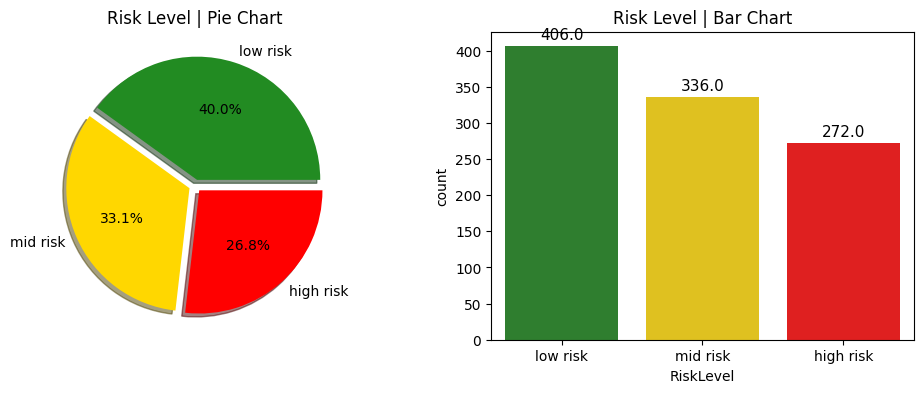

In [32]:
p_colors = ['forestgreen', 'gold', 'red']
risk_order = ["low risk", "mid risk", "high risk"]
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

df["RiskLevel"].value_counts().plot(kind="pie", labels=risk_order, colors=p_colors, explode=[0.05, 0.05,  0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title("Risk Level | Pie Chart")
ax[0].set_ylabel('')

count = sns.countplot(x="RiskLevel", data=df, ax=ax[1], order=risk_order, palette=p_colors)
for bar in count.patches:
    count.annotate(format(bar.get_height()),
        (bar.get_x() + bar.get_width() / 2,
        bar.get_height()), ha='center', va='center',
        size=11, xytext=(0, 8),
        textcoords='offset points')
ax[1].set_title("Risk Level | Bar Chart")
plt.show()

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1014.0,29.871795,13.474386,10.0,19.0,26.0,39.0,70.0
SystolicBP,1014.0,113.198225,18.403913,70.0,100.0,120.0,120.0,160.0
DiastolicBP,1014.0,76.460552,13.885796,49.0,65.0,80.0,90.0,100.0
BS,1014.0,8.725986,3.293532,6.0,6.9,7.5,8.0,19.0
BodyTemp,1014.0,98.665089,1.371384,98.0,98.0,98.0,98.0,103.0
HeartRate,1014.0,74.301775,8.088702,7.0,70.0,76.0,80.0,90.0


In [34]:
def num_plot(df, col):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(data=df, x=col, kde=True, ax=ax[0])
    sns.boxplot(data=df, x=col, ax=ax[1])
    ax[0].set_title(f"{col} Distribution Histogram")
    ax[1].set_title(f"{col} Distribution Boxplot")

    plt.show()

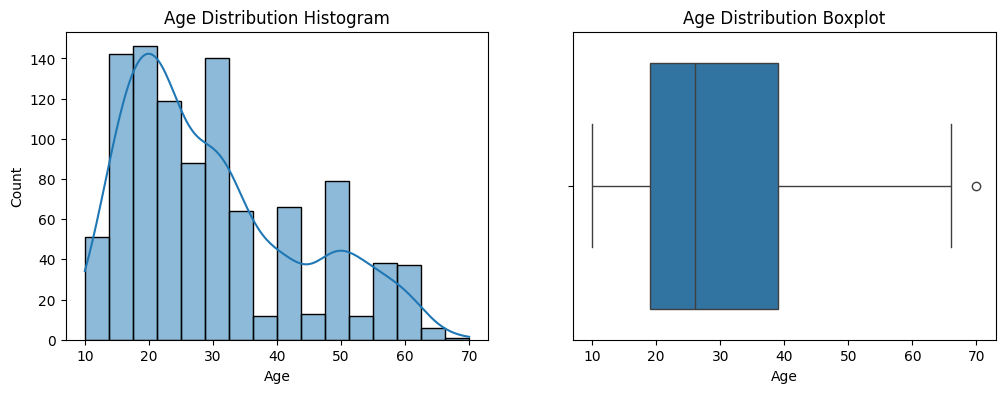

In [35]:
num_plot(df, "Age")

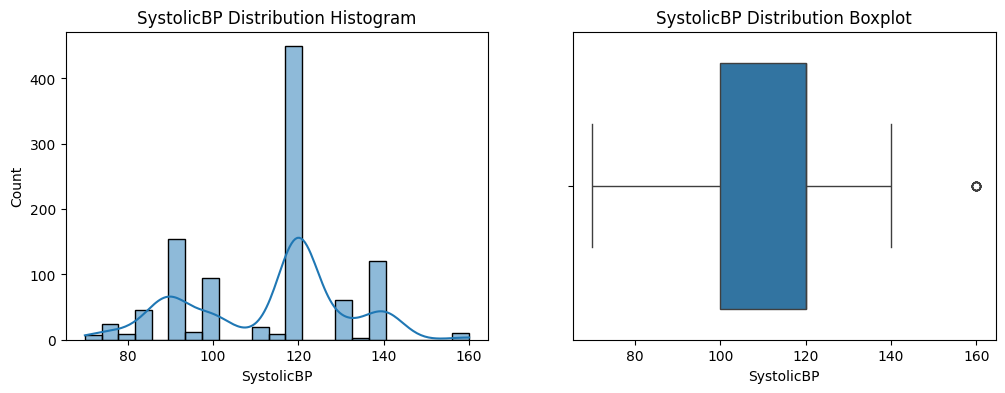

In [36]:
num_plot(df, "SystolicBP")

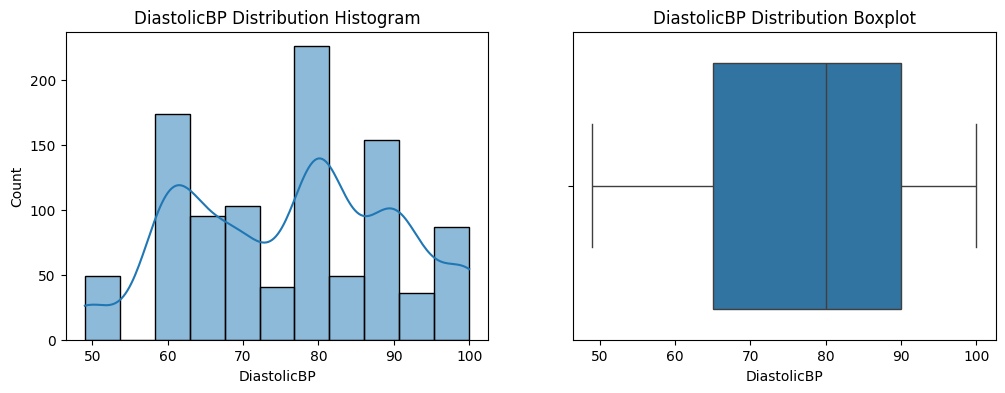

In [37]:
num_plot(df, "DiastolicBP")

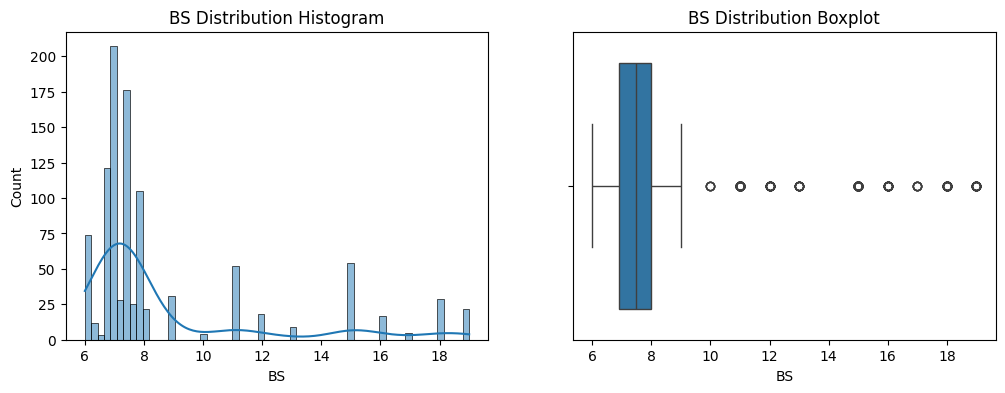

In [38]:
num_plot(df, "BS")

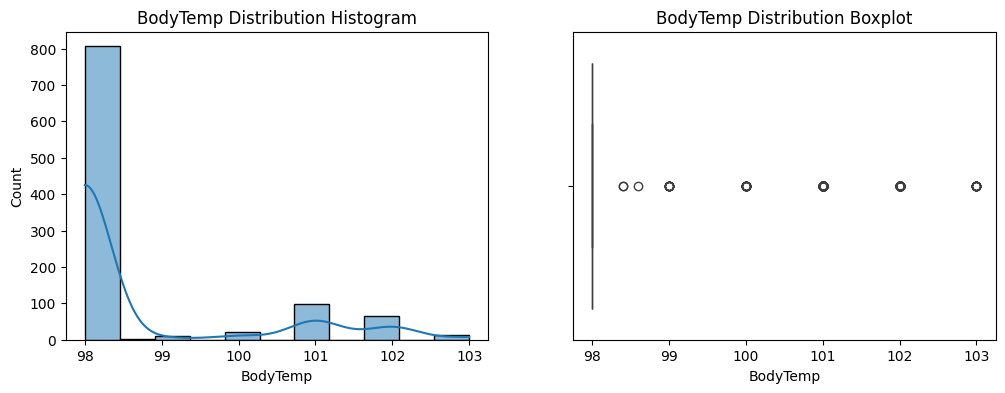

In [39]:
num_plot(df, "BodyTemp")

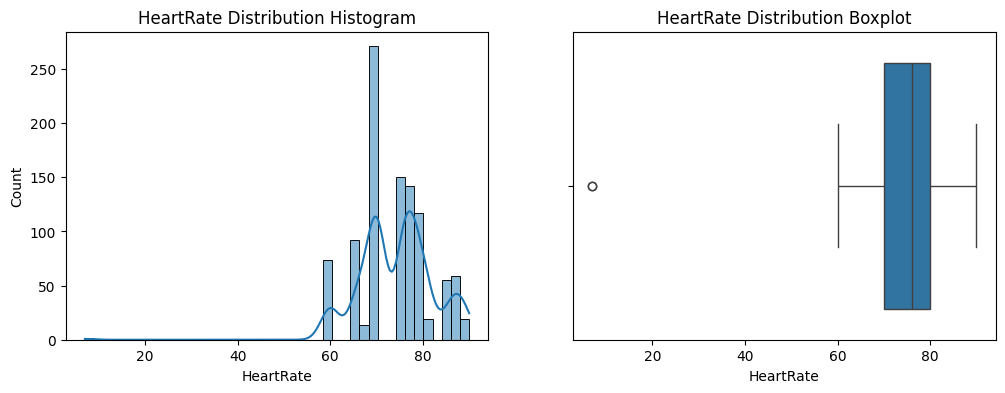

In [40]:
num_plot(df, "HeartRate")

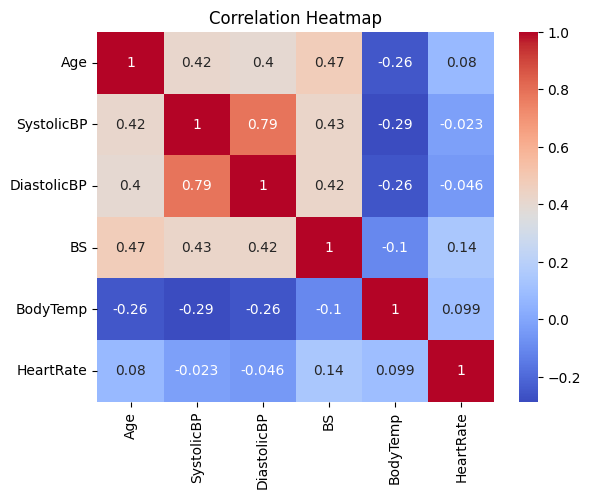

In [45]:
# Drop the non-numeric column before calculating the correlation
numeric_df = df.drop(columns=['RiskLevel'])

# Calculate the correlation matrix for the numeric columns
correlation_matrix = numeric_df.corr()

# Plot the correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


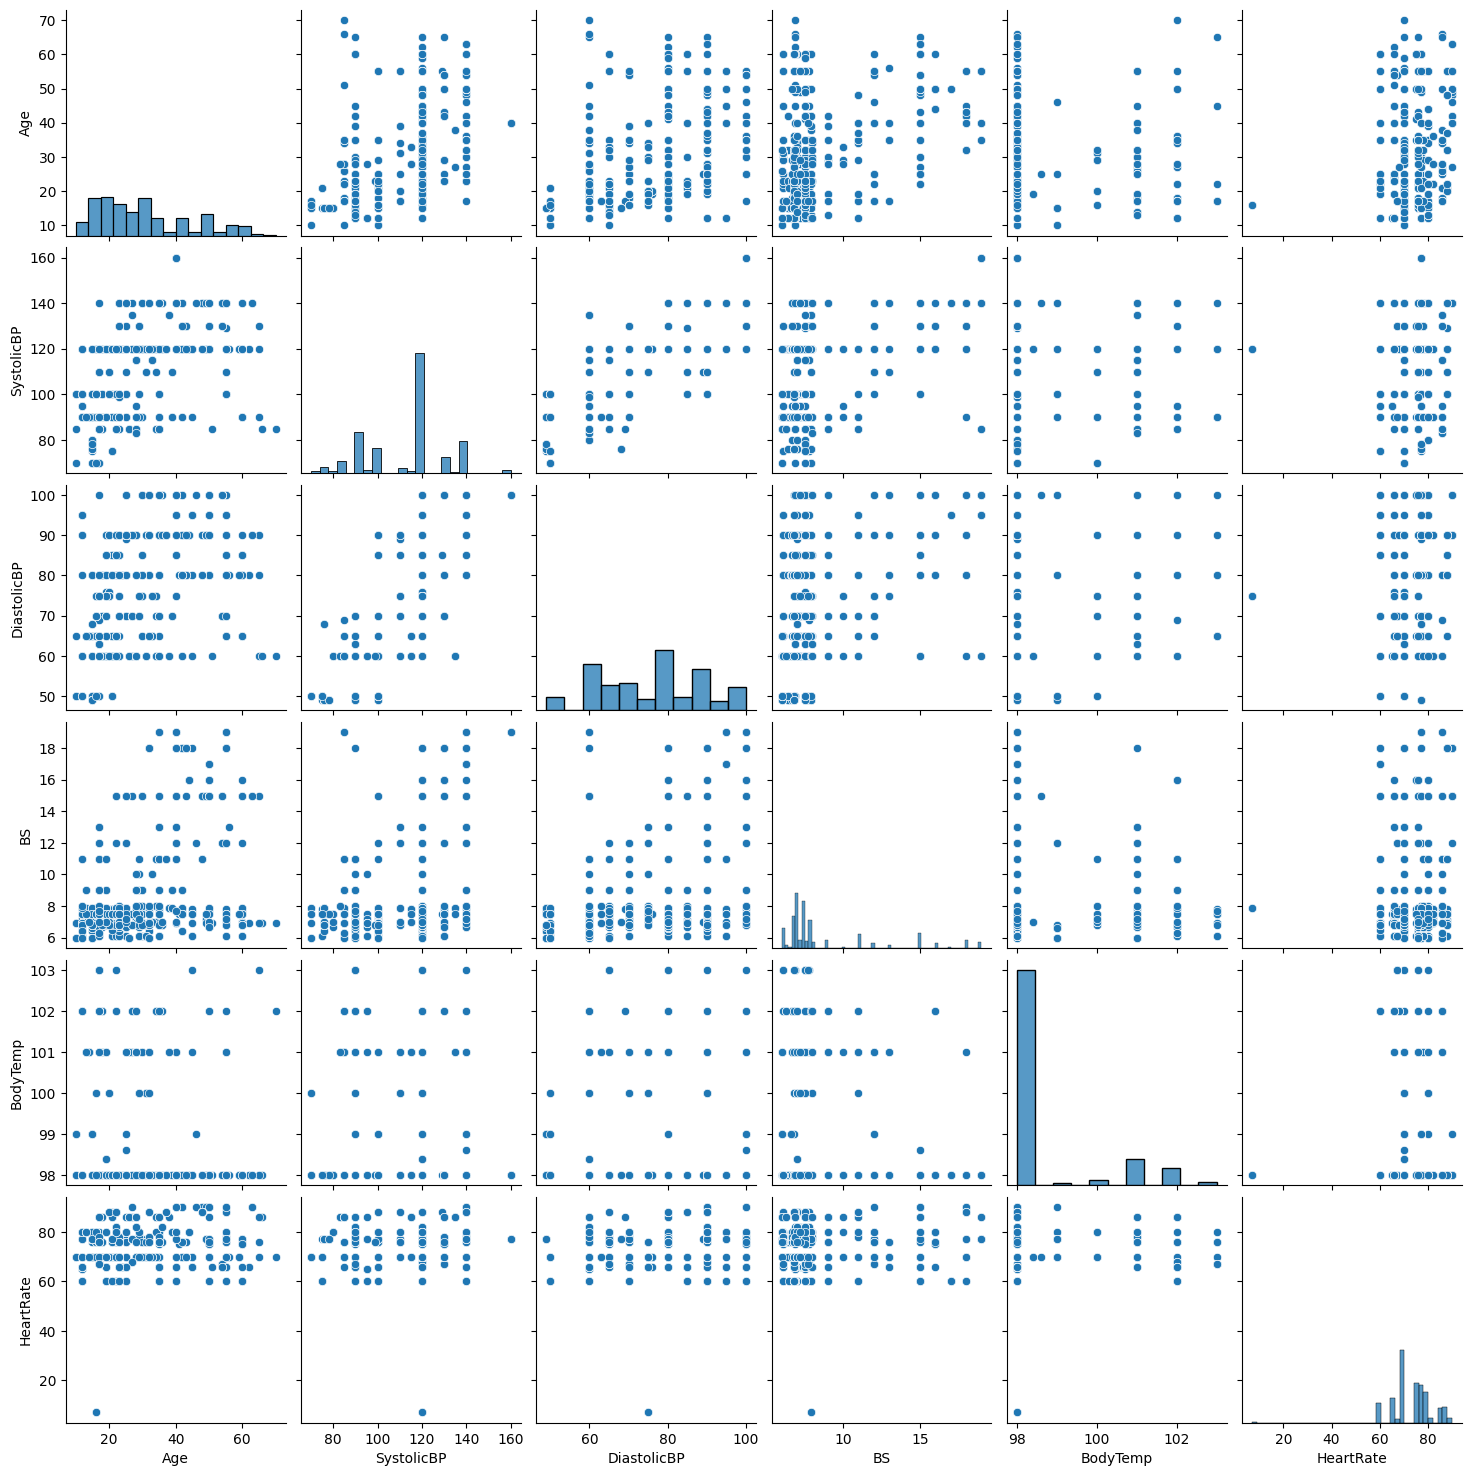

In [46]:
sns.pairplot(df)
plt.show()

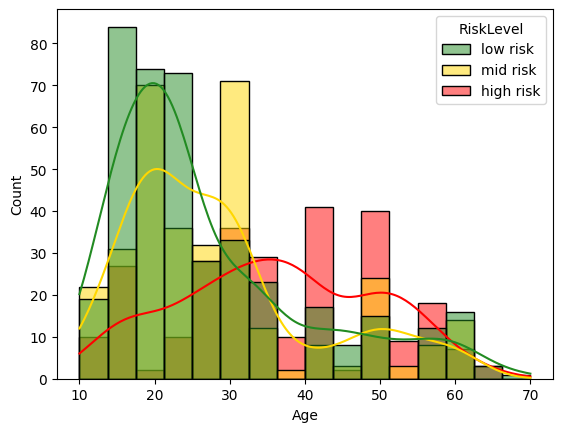

In [47]:
sns.histplot(data=df, x="Age", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

In [48]:
pd.crosstab(df.RiskLevel, df.Age).style.background_gradient(cmap='summer_r')

Age,10,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,54,55,56,59,60,62,63,65,66,70
RiskLevel,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
high risk,0,7,3,3,0,0,24,0,2,0,0,5,5,0,21,0,2,5,8,10,0,18,2,3,22,2,6,2,2,34,0,4,3,0,1,1,16,2,22,0,9,17,1,0,7,0,2,1,0,0
low risk,2,15,2,0,56,10,18,8,28,11,27,28,42,3,16,0,5,7,2,6,7,18,0,2,21,0,0,0,0,1,1,15,0,0,8,0,4,5,5,1,0,12,0,2,13,1,0,2,1,1
mid risk,2,13,7,0,4,6,21,11,37,11,11,12,24,0,11,3,2,16,30,14,15,12,3,0,7,2,0,0,2,2,0,4,2,3,0,0,6,2,16,0,3,8,0,0,14,0,0,0,0,0


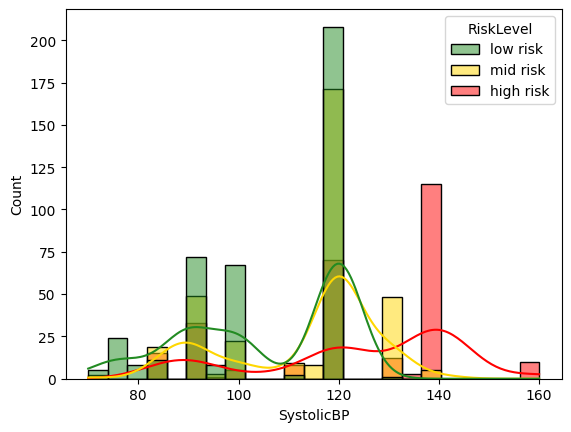

In [49]:
sns.histplot(data=df, x="SystolicBP", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

In [50]:
pd.crosstab(df.RiskLevel, df.SystolicBP).style.background_gradient(cmap='summer_r')

SystolicBP,70,75,76,78,80,83,85,90,95,99,100,110,115,120,129,130,135,140,160
RiskLevel,,,,,,,,,,,,,,,,,,,
high risk,0,0,0,0,0,2,13,33,1,0,5,8,0,70,0,12,3,115,10
low risk,5,8,16,3,5,0,11,72,8,2,65,2,0,208,1,0,0,0,0
mid risk,2,0,0,0,0,0,19,49,3,0,22,9,8,171,0,48,0,5,0


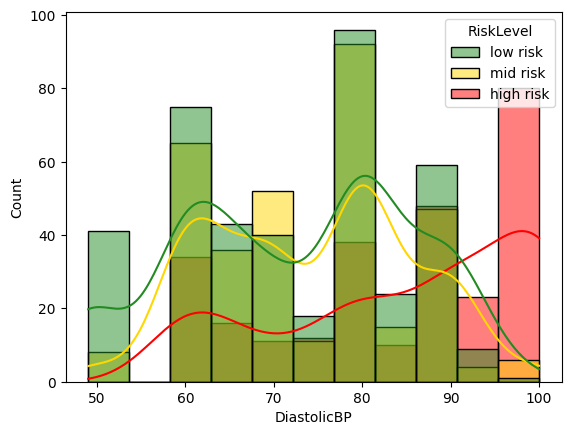

In [51]:
sns.histplot(data=df, x="DiastolicBP", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

In [52]:
pd.crosstab(df.RiskLevel, df.DiastolicBP).style.background_gradient(cmap='summer_r')

DiastolicBP,49,50,60,63,65,68,69,70,75,76,80,85,89,90,95,100
RiskLevel,,,,,,,,,,,,,,,,
high risk,0,0,34,2,14,0,1,10,12,0,38,10,0,48,23,80
low risk,25,16,75,2,41,2,0,38,15,3,96,24,1,58,9,1
mid risk,0,8,65,4,32,0,0,52,11,0,92,15,0,47,4,6


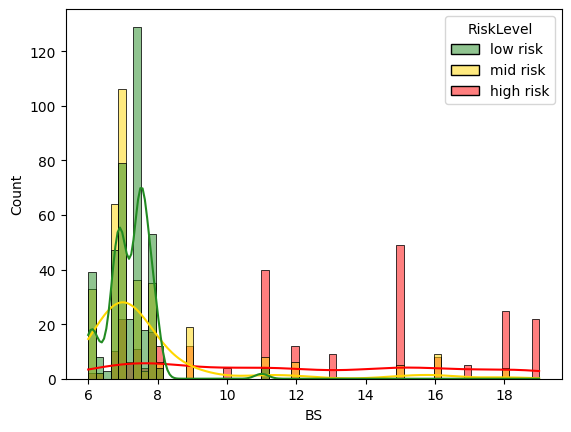

In [53]:
sns.histplot(data=df, x="BS", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

In [54]:
pd.crosstab(df.RiskLevel, df.BS).style.background_gradient(cmap='summer_r')

BS,6.000000,6.100000,6.300000,6.400000,6.500000,6.600000,6.700000,6.800000,6.900000,7.000000,7.010000,7.100000,7.200000,7.500000,7.600000,7.700000,7.800000,7.900000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,15.000000,16.000000,17.000000,18.000000,19.000000
RiskLevel,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
high risk,0,2,2,0,0,0,0,10,8,9,5,0,6,11,0,4,5,12,12,12,4,40,12,9,49,8,5,25,22
low risk,7,32,0,8,1,2,10,37,47,29,3,8,14,129,1,17,19,34,4,0,0,4,0,0,0,0,0,0,0
mid risk,14,19,0,2,0,0,23,41,58,41,7,0,0,36,0,3,21,14,6,19,0,8,6,0,5,9,0,4,0


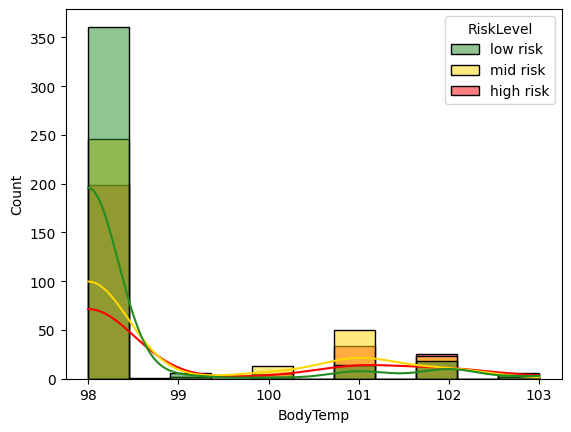

In [55]:
sns.histplot(data=df, x="BodyTemp", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

In [56]:
pd.crosstab(df.RiskLevel, df.BodyTemp).style.background_gradient(cmap='summer_r')

BodyTemp,98.000000,98.400000,98.600000,99.000000,100.000000,101.000000,102.000000,103.000000
RiskLevel,,,,,,,,
high risk,199,0,1,2,5,34,25,6
low risk,359,2,0,6,2,14,18,5
mid risk,246,0,0,2,13,50,23,2


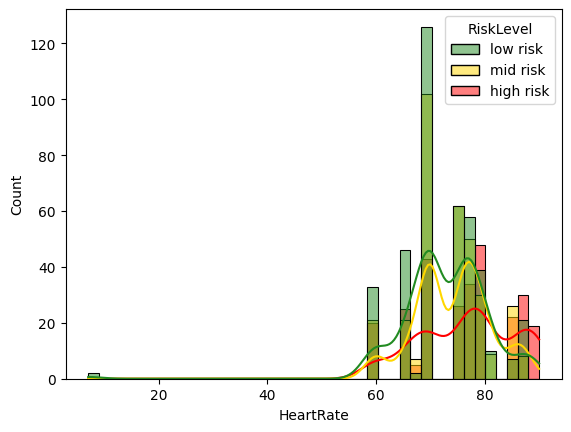

In [57]:
sns.histplot(data=df, x="HeartRate", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

In [58]:
pd.crosstab(df.RiskLevel, df.HeartRate).style.background_gradient(cmap='summer_r')

HeartRate,7,60,65,66,67,68,70,75,76,77,78,80,82,86,88,90
RiskLevel,,,,,,,,,,,,,,,,
high risk,0,20,0,25,5,0,43,6,20,25,9,48,0,22,30,19
low risk,2,33,2,44,2,0,126,7,55,56,2,39,10,7,21,0
mid risk,0,21,3,18,5,2,102,6,56,15,35,30,9,26,8,0


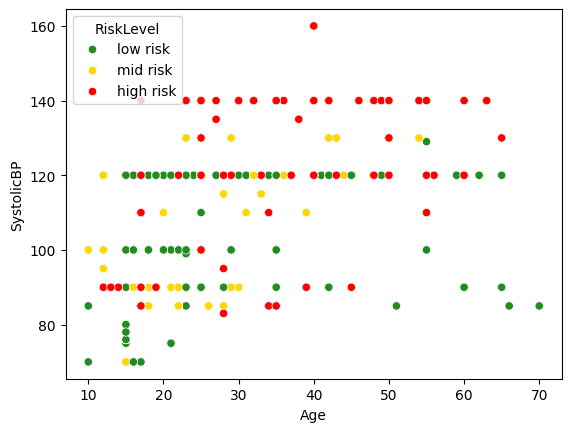

In [59]:
sns.scatterplot(data=df, x="Age", y="SystolicBP", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

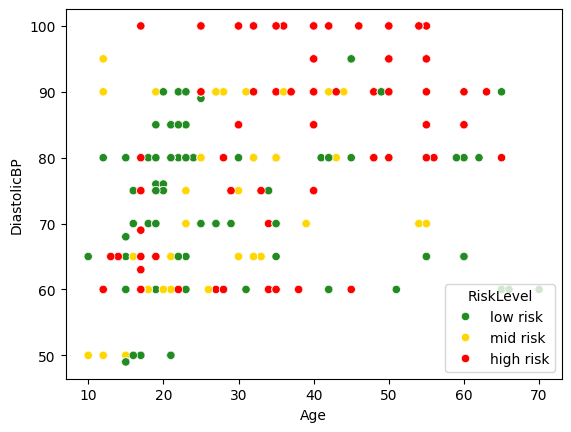

In [60]:
sns.scatterplot(data=df, x="Age", y="DiastolicBP", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

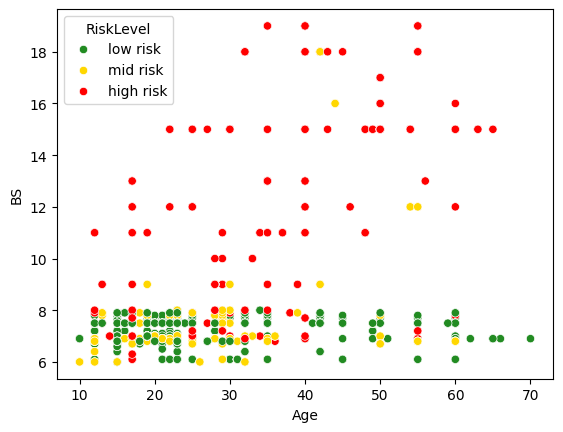

In [61]:
sns.scatterplot(data=df, x="Age", y="BS", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

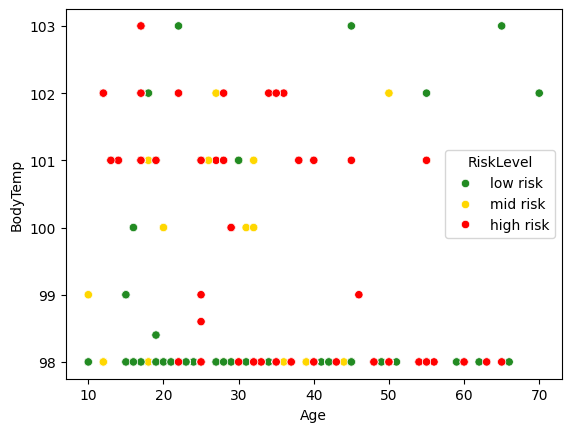

In [62]:
sns.scatterplot(data=df, x="Age", y="BodyTemp", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

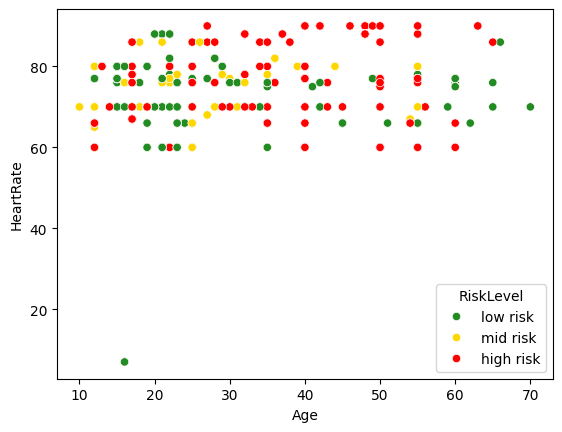

In [63]:
sns.scatterplot(data=df, x="Age", y="HeartRate", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

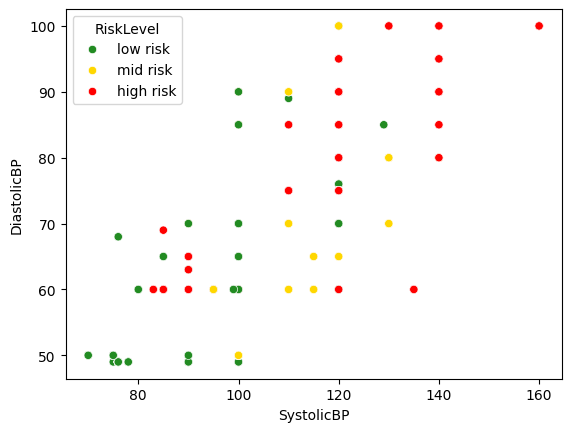

In [64]:
sns.scatterplot(data=df, x="SystolicBP", y="DiastolicBP", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

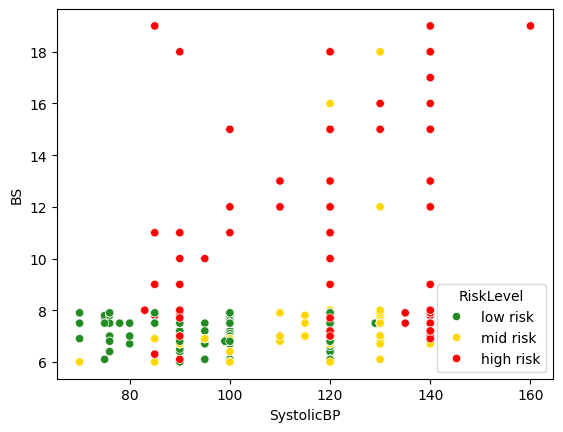

In [65]:
sns.scatterplot(data=df, x="SystolicBP", y="BS", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

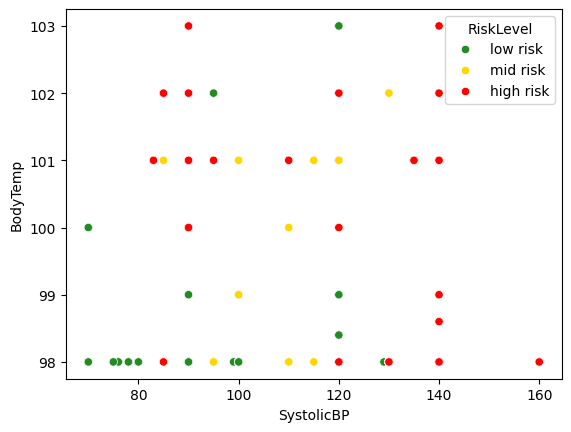

In [66]:
sns.scatterplot(data=df, x="SystolicBP", y="BodyTemp", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

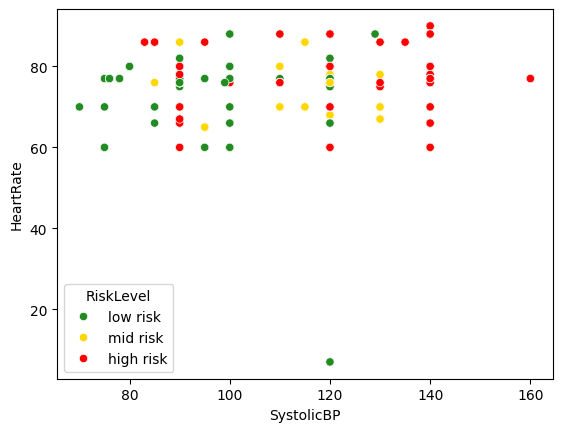

In [67]:
sns.scatterplot(data=df, x="SystolicBP", y="HeartRate", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

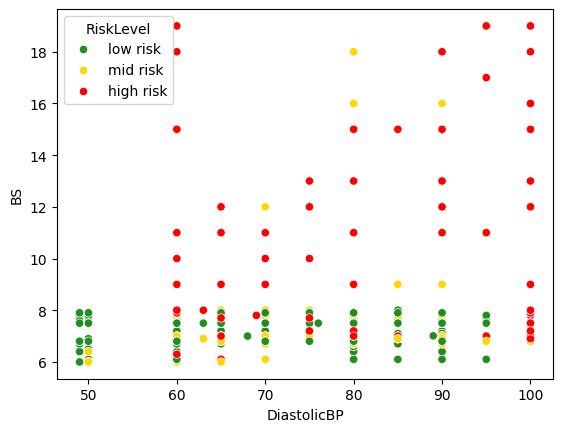

In [68]:
sns.scatterplot(data=df, x="DiastolicBP", y="BS", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

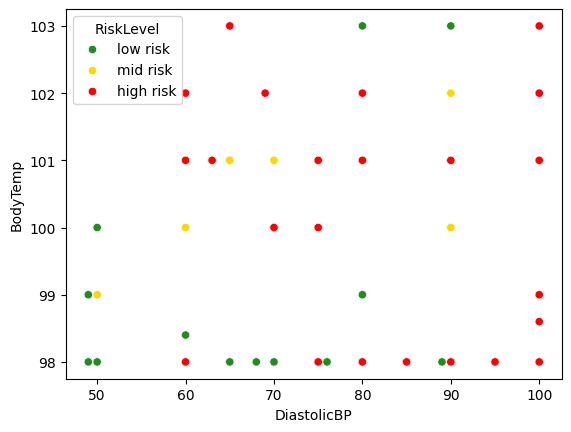

In [69]:
sns.scatterplot(data=df, x="DiastolicBP", y="BodyTemp", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

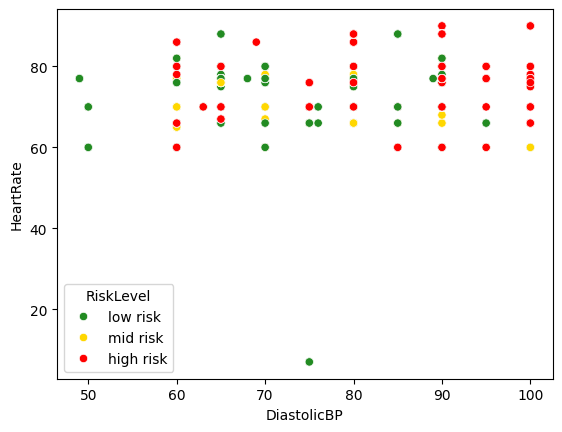

In [70]:
sns.scatterplot(data=df, x="DiastolicBP", y="HeartRate", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

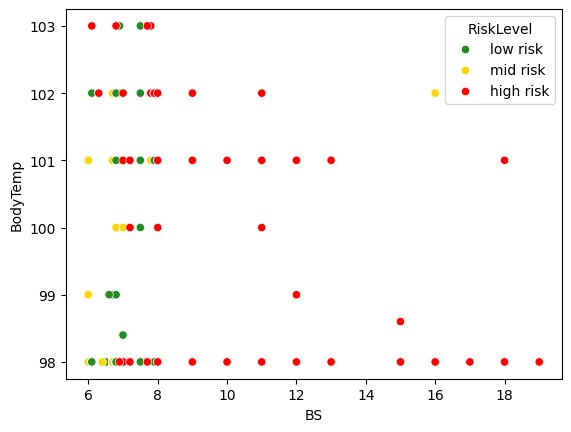

In [71]:
sns.scatterplot(data=df, x="BS", y="BodyTemp", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

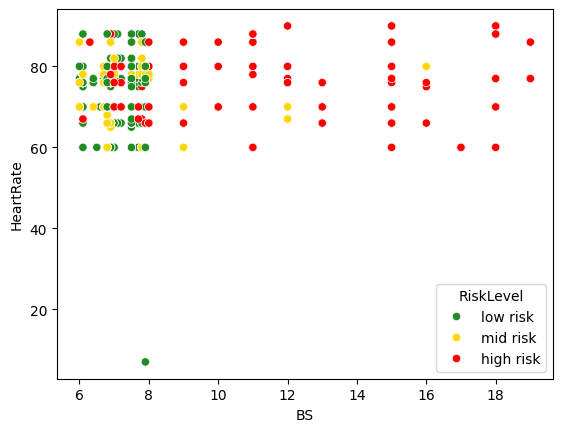

In [72]:
sns.scatterplot(data=df, x="BS", y="HeartRate", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

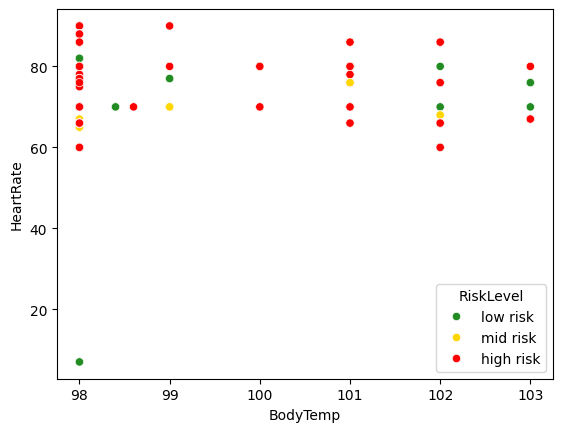

In [73]:
sns.scatterplot(data=df, x="BodyTemp", y="HeartRate", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

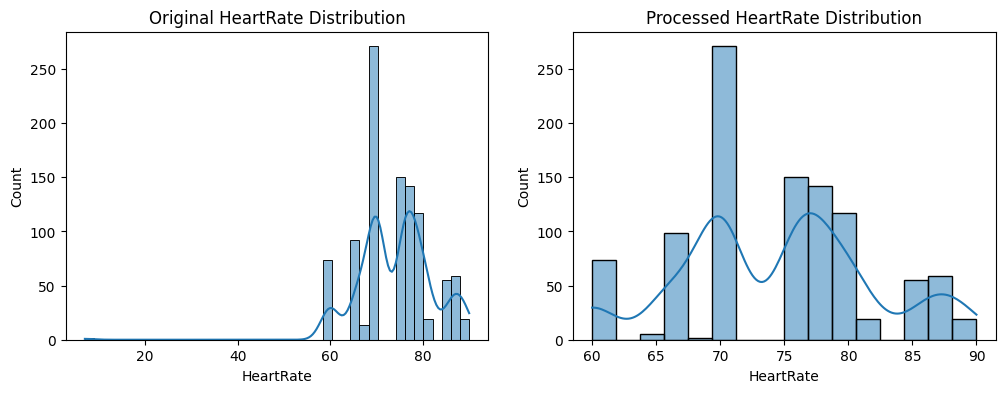

In [74]:
data_proc = df.drop(df.index[df.HeartRate == 7])

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(data=df, x="HeartRate", kde=True, ax=ax[0])
sns.histplot(data=data_proc, x="HeartRate", kde=True, ax=ax[1])
ax[0].set_title("Original HeartRate Distribution")
ax[1].set_title("Processed HeartRate Distribution")
plt.show()

In [75]:
data_proc = data_proc.drop(["HeartRate"], axis=1)

In [76]:
# Original Dataset
X = df.drop("RiskLevel", axis=1)
y = df.RiskLevel
x_train, x_test, y_train, y_test = split(X, y, test_size=0.25, random_state=1)

# Processed Dataset
X_proc = data_proc.drop("RiskLevel", axis=1)
y_proc = data_proc.RiskLevel
x_train_proc, x_test_proc, y_train_proc, y_test_proc = split(X_proc, y_proc, test_size=0.2, random_state=1)

print(f"Original data has {x_train.shape[0]} train data and {x_test.shape[0]} test data\n")
print(f"Processes data has {x_train_proc.shape[0]} train data and {x_test_proc.shape[0]} test data")

Original data has 760 train data and 254 test data

Processes data has 809 train data and 203 test data


In [77]:
# Using original dataset
rf = RandomForestClassifier(random_state=100)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(f"Original Dataset Accuracy: {accuracy_score(y_test, y_pred)}")

# Using processed dataset
rf2 = RandomForestClassifier(random_state=100)
rf2.fit(x_train_proc, y_train_proc)
y_pred = rf2.predict(x_test_proc)
print(f"Processed Dataset Accuracy: {accuracy_score(y_test_proc, y_pred)}")

Original Dataset Accuracy: 0.8582677165354331
Processed Dataset Accuracy: 0.8916256157635468


In [78]:
params = {
    "n_estimators": [10, 20, 50, 100],
    "criterion": ["gini", "entropy"]
}
rf = RandomForestClassifier(random_state=100)
grid = GridSearchCV(rf, params, cv=10)
grid.fit(x_train_proc, y_train_proc)
print("Best hyperparameter:", grid.best_params_)

Best hyperparameter: {'criterion': 'gini', 'n_estimators': 50}


In [79]:
pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score")[["params", "mean_test_score", "rank_test_score"]]

,params,mean_test_score,rank_test_score
2,"{'criterion': 'gini', 'n_estimators': 50}",0.831867,1
3,"{'criterion': 'gini', 'n_estimators': 100}",0.830648,2
7,"{'criterion': 'entropy', 'n_estimators': 100}",0.828179,3
6,"{'criterion': 'entropy', 'n_estimators': 50}",0.828164,4
1,"{'criterion': 'gini', 'n_estimators': 20}",0.823241,5
5,"{'criterion': 'entropy', 'n_estimators': 20}",0.822006,6
4,"{'criterion': 'entropy', 'n_estimators': 10}",0.818210,7
0,"{'criterion': 'gini', 'n_estimators': 10}",0.808302,8


In [80]:
y_pred = grid.predict(x_test_proc)
print(f"Processed Dataset Accuracy: {accuracy_score(y_test_proc, y_pred)}")

Processed Dataset Accuracy: 0.9014778325123153


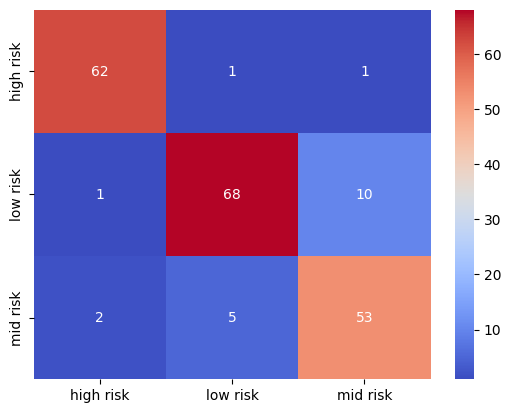

In [81]:
labels = np.unique(y_pred)
sns.heatmap(confusion_matrix(y_test_proc, y_pred), annot=True, xticklabels=labels, yticklabels=labels, cmap="coolwarm")
plt.show()